In [51]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as ny
from bindec import dec_to_bin, bin_to_dec
from copy import copy as cpy

In [52]:
url=r"C:\Users\spectrumxking\Desktop\Project Final Sem\polly\ank.jpg"
pic = cv.imread(url, cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original')

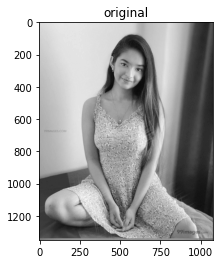

In [53]:
plt.imshow(pic,cmap="gray")
plt.title("original")


In [54]:
#readinf the image height and width
print(pic.shape)

(1350, 1080)


In [55]:
# converting original image into its 8bit binary form using binary_reper() 
lst=[]
for i in range (pic.shape[0]):
    for j in range (pic.shape[1]):
        lst.append(ny.binary_repr(pic[i][j], width=8))

In [56]:
# making the 8 bitplanes
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])

In [57]:
titles = ['original', 'bitplane8', 'bitplane7', 'bitplane6', 'bitplane5', 'bitplane4', 'bitplane3', 'bitplane2', 'bitplane1']
images = [pic, bitplane8, bitplane7, bitplane6, bitplane5, bitplane4, bitplane3, bitplane2, bitplane1]

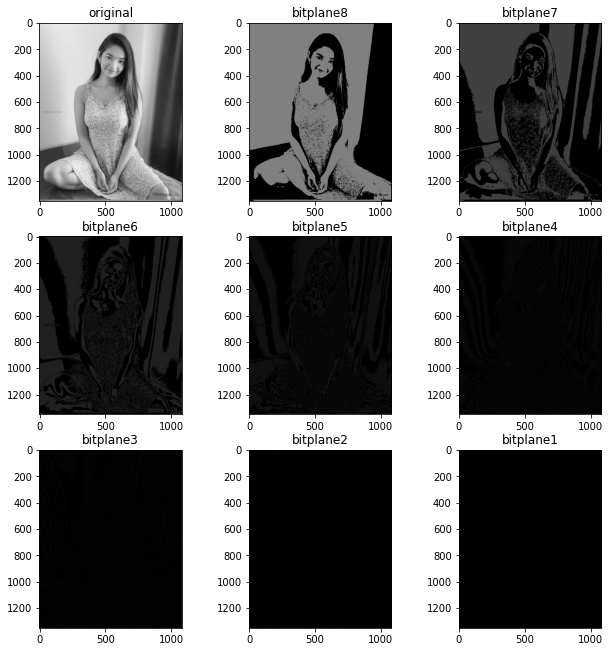

In [58]:
#showing the bitplanes into 3planes in a row.....
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [62]:
#each bitplanes in its binary form (saving by using index list)
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane8.shape
print(lst[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane7.shape
print (lst[2])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
print (lst[3])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
print (lst[4])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
print (lst[5])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
print (lst[6])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
print (lst[7])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])
print (lst[8])

11010111
11011000
11011001
11011001
11011001
11011001
11011001
11011100
